In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pibs = pd.read_excel("pibs-dptos.xlsx",
                     sheet_name='Cuadro 2',
                     skiprows=9,
                     usecols='A:T',
                     nrows=34)

In [ ]:
pibs = pibs[pibs['DEPARTAMENTOS']!='COLOMBIA']

In [ ]:
pibs.rename(columns = {'2020p':2020, '2021p':2021, '2022pr':2022}, inplace=True)

In [ ]:
pibs.columns

Index(['Código Departamento (DIVIPOLA)',                  'DEPARTAMENTOS',
                                   2005,                             2006,
                                   2007,                             2008,
                                   2009,                             2010,
                                   2011,                             2012,
                                   2013,                             2014,
                                   2015,                             2016,
                                   2017,                             2018,
                                   2019,                             2020,
                                   2021,                             2022],
      dtype='object')

In [ ]:
def gini(array):
  def cumsum(array):
    output = [0]
    counter = 0
    total = sum(array)
    for e in array:
      counter = counter + e
      output.append(counter/total)
    return output
  array.sort()
  n = [i/len(array) for i in range(0,len(array)+1)]
  acum_array = cumsum(array)
  area = 0
  for i in range(1,len(acum_array)):
    area = area +  (acum_array[i] + acum_array[i-1]) * (n[i] - n[i-1])
  return 1  - area

In [ ]:
sts, ratio = [], []
for year in range(2005, 2023):
  sts.append(pibs[year].std())
  ratio.append(pibs[year].max()/pibs[year].min()) # ratio

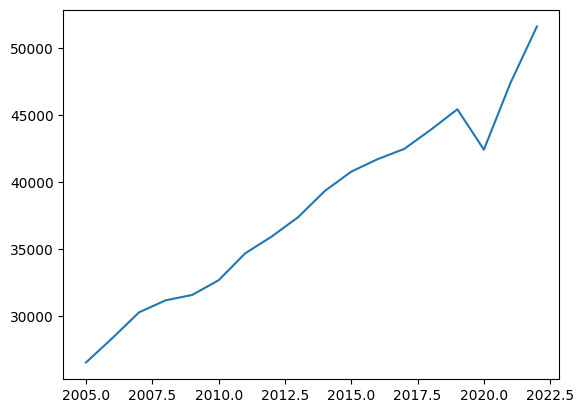

In [ ]:
plt.plot(range(2005, 2023), sts)

In [ ]:
data = pd.DataFrame({'time':range(2005,2023),
                     'inequality':sts,
                     'ratio':ratio} )

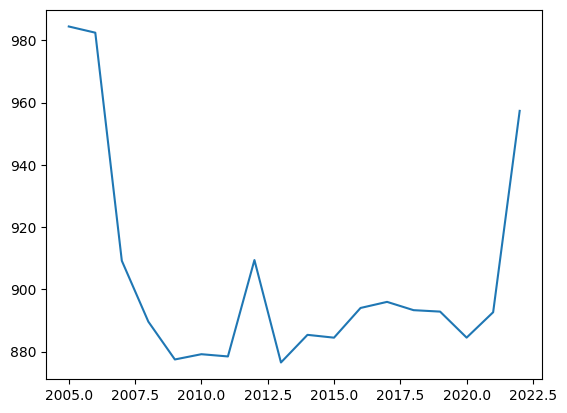

In [ ]:
plt.plot(data['time'], data['ratio'])

In [ ]:
ginis = []
for year in range(2005,2023):
  ginis.append(gini(pibs[year].to_list()))

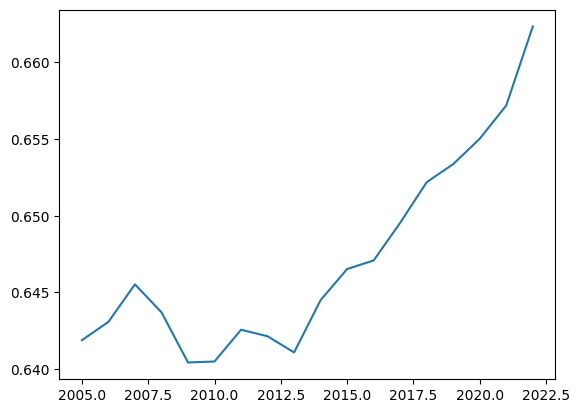

In [ ]:
plt.plot(range(2005,2023),ginis)

In [ ]:
def gini(array):
  def cumsum(array):
    output = [0]
    counter = 0
    total = sum(array)
    for e in array:
      counter = counter + e
      output.append(counter/total)
    return output
  array.sort()
  n = [i/len(array) for i in range(0,len(array)+1)]
  acum_array = cumsum(array)
  area = 0
  for i in range(1,len(acum_array)):
    area = area +  (acum_array[i] + acum_array[i-1]) * (n[i] - n[i-1])
  return n, acum_array

In [ ]:
N, Y = gini(pibs[2005].to_list())

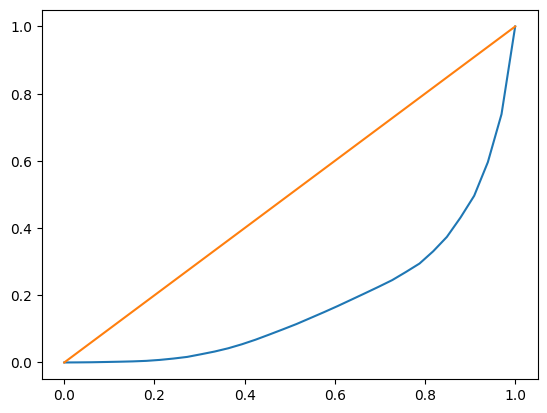

In [ ]:
plt.plot(N,Y)
plt.plot(N,N)

In [ ]:
tasas = []
for year in range(2007, 2023):
  tasas.append('tasa'+str(year))
  pibs['tasa' + str(year)] = (pibs[year] - pibs[year-1])/pibs[year-1]

In [ ]:
pibs['mean rate'] = pibs[tasas].mean(axis=1)

In [ ]:
pibs[[2005, 'mean rate']]

,2005,mean rate
1,413.007446,0.032208
2,73922.532786,0.040295
3,5044.233001,-0.002292
4,22121.967036,0.040811
5,135214.860000,0.038425
6,18885.522452,0.037276
7,13069.081142,0.039422
8,9411.269444,0.027252
9,2088.258973,0.035700
10,10003.615838,0.020312
